# Part II - (Ford go Bike tripdata)
## by (Muhammad Bello Yahaya)

## Investigation Overview


> In this analysis, I would like to figure that when and where are most trips taken, and what kind of characteristics are in these locations and time periods. The characteristics include rider's attributes (sex, age, and user_type) and duration of trips.


## Dataset Overview

> This dataset includes 23650 trips with 23 features such as locations, time, and user attributes. The dataset is subsetted by choosing top 8 trips start stations with the most trips due to the same stations with same amount of trips in the end stations. 

In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [11]:
# load in the dataset into a pandas dataframe
df_top8 = pd.read_csv("201902-fordgobike-tripdata-clean.csv")

In [12]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jan','Feb','Mar','Apr','May','Jun'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_top8[var] = df_top8[var].astype(ordered_var)

In [13]:
df_cust = df_top8.query('user_type == "Customer"')
df_sub = df_top8.query('user_type == "Subscriber"')

## (The top 8 stations with the most trips)

> All of the start stations with the most trips are in San Francisco and connect to public transportations such as Caltrain, Bart and Ferry.

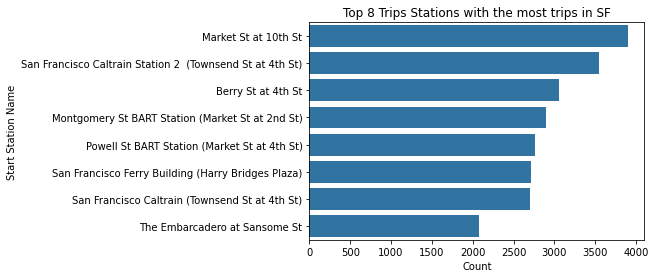

In [14]:

st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Trips Stations with the most trips in SF');

## The time with most trips

> There are the most trips in the morning.
There are the most trips during the weekdays than the weekends.

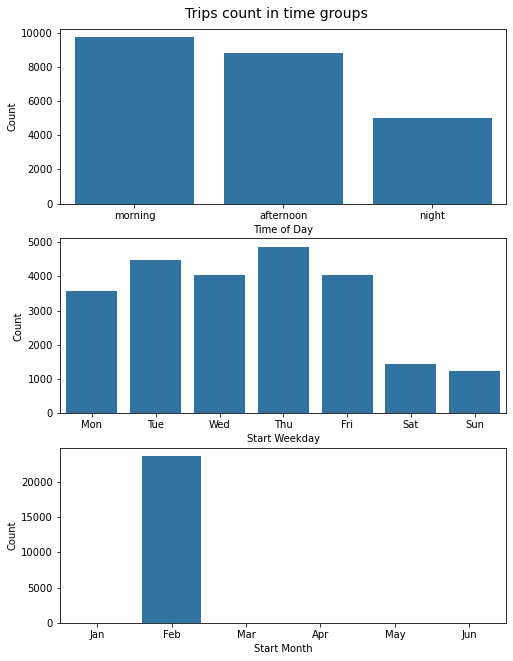

In [6]:
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top8, x = 'period_day', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'start_weekday_char', color = default_color, ax = ax[1])
sb.countplot(data = df_top8, x = 'start_month_char', color = default_color, ax = ax[2])
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Start Weekday')
ax[1].set_ylabel('Count')
ax[2].set_xlabel('Start Month')
ax[2].set_ylabel('Count')
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips count in time groups', fontsize=14);

## The top 8 stations with the most trips by weekdays in each user type

After separating user types, for customers, there are 6 out of 8 stations with the most trips in the weekend. Most of trips happen at Ferry Building and Embarcadero that are very popular tourist attractions. On the other hand, for subscribers, most of trips happen during the weekdays. Subscribers are more likely commuters.

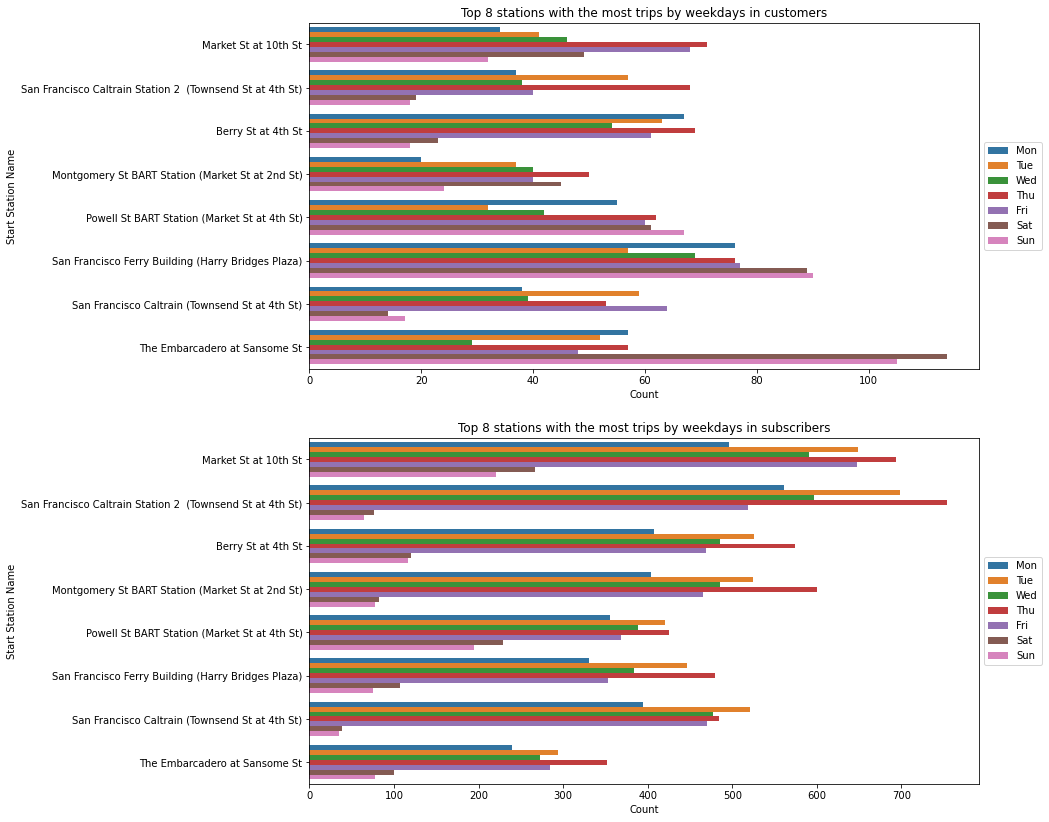

In [7]:
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_weekday_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 stations with the most trips by weekdays in customers')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_weekday_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 stations with the most trips by weekdays in subscribers');

# The top 8 stations with the most trips by months in each user type

The distributions in each month support that customers might include tourists because the most trips happen in August at Ferry Building and Embarcadero. For subscribers.

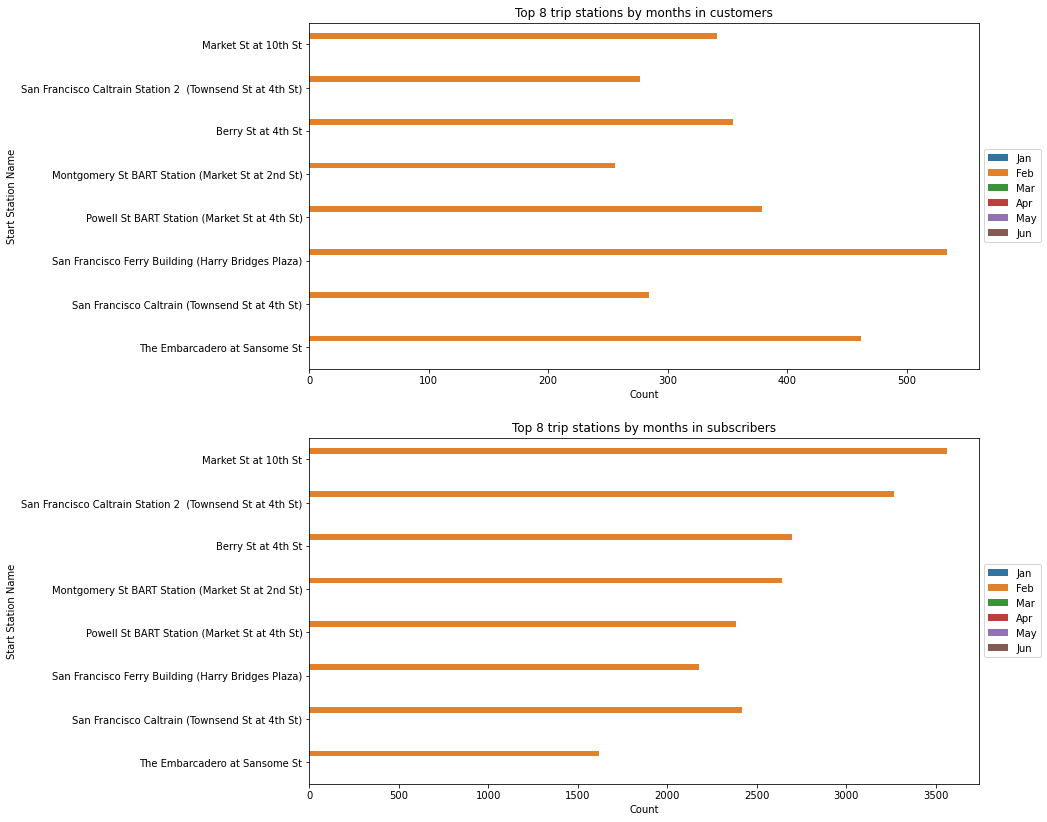

In [8]:
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_month_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 trip stations by months in customers')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_month_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 trip stations by months in subscribers');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [20]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 787572 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\tea_facts\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\.conda\envs\tea_facts\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\.conda\envs\tea_facts\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\.conda\envs\tea_facts\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\.conda\envs\tea_fa

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
